In [ ]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_excel('/content/Regional Sales Dataset.xlsx',sheet_name=None)

In [ ]:
df

{'Sales Orders':         OrderNumber  OrderDate  Customer Name Index      Channel  \
 0       SO - 000225 2014-01-01                  126    Wholesale   
 1      SO - 0003378 2014-01-01                   96  Distributor   
 2      SO - 0005126 2014-01-01                    8    Wholesale   
 3      SO - 0005614 2014-01-01                   42       Export   
 4      SO - 0005781 2014-01-01                   73    Wholesale   
 ...             ...        ...                  ...          ...   
 64099  SO - 0007573 2018-02-28                   74    Wholesale   
 64100  SO - 0007706 2018-02-28                   51       Export   
 64101  SO - 0007718 2018-02-28                  136  Distributor   
 64102  SO - 0008084 2018-02-28                  158  Distributor   
 64103  SO - 0008654 2018-02-28                   22  Distributor   
 
       Currency Code Warehouse Code  Delivery Region Index  \
 0               USD         AXW291                    364   
 1               USD         A

In [ ]:
sheet_sales=df['Sales Orders']
sheet_customers=df['Customers']
sheet_regions=df['Regions']
sheet_stregions=df['State Regions']
sheet_products=df['Products']
sheet_budgets=df['2017 Budgets']

In [ ]:
print('sales shape',sheet_sales.shape)
print('customers shape',sheet_customers.shape)
print('regions shape',sheet_regions.shape)
print('state regions shape',sheet_stregions.shape)
print('products shape',sheet_products.shape)
print('budgets shape',sheet_budgets.shape)

sales shape (64104, 12)
customers shape (175, 2)
regions shape (994, 15)
state regions shape (49, 3)
products shape (30, 2)
budgets shape (30, 2)


In [ ]:
sheet_sales.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270


In [ ]:
sheet_customers.head(5)

,Customer Index,Customer Names
0,1,Geiss Company
1,2,Jaxbean Group
2,3,Ascend Ltd
3,4,Eire Corp
4,5,Blogtags Ltd


In [ ]:
sheet_regions.head(5)

,id,name,county,state_code,state,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,1,Auburn,Lee County,AL,Alabama,City,32.60986,-85.48078,334,62059,21767,38342,152375113,2646161,America/Chicago
1,2,Birmingham,Shelby County/Jefferson County,AL,Alabama,City,33.52744,-86.79905,205,212461,89972,31061,378353942,6591013,America/Chicago
2,3,Decatur,Limestone County/Morgan County,AL,Alabama,City,34.57332,-86.99214,256,55437,22294,41496,141006257,17594716,America/Chicago
3,4,Dothan,Dale County/Houston County/Henry County,AL,Alabama,City,31.23370,-85.40682,334,68567,25913,42426,232166237,835468,America/Chicago
4,5,Hoover,Shelby County/Jefferson County,AL,Alabama,City,33.37695,-86.80558,205,84848,32789,77146,122016784,2553332,America/Chicago


In [ ]:
sheet_stregions.head(5)

,Column1,Column2,Column3
0,State Code,State,Region
1,AL,Alabama,South
2,AR,Arkansas,South
3,AZ,Arizona,West
4,CA,California,West


In [ ]:
sheet_products.head(5)

,Index,Product Name
0,1,Product 1
1,2,Product 2
2,3,Product 3
3,4,Product 4
4,5,Product 5


In [ ]:
sheet_budgets.head(5)

,Product Name,2017 Budgets
0,Product 1,3016489.209
1,Product 2,3050087.565
2,Product 3,2642352.432
3,Product 4,2885560.824
4,Product 5,3925424.542


In [ ]:
new_header=sheet_stregions.iloc[0]
sheet_stregions=sheet_stregions[1:]
sheet_stregions.columns=new_header

sheet_stregions.head(5)



,State Code,State,Region
1,AL,Alabama,South
2,AR,Arkansas,South
3,AZ,Arizona,West
4,CA,California,West
5,CO,Colorado,West


In [ ]:
sheet_sales.isnull().sum()

,0
OrderNumber,0
OrderDate,0
Customer Name Index,0
Channel,0
Currency Code,0
Warehouse Code,0
Delivery Region Index,0
Product Description Index,0
Order Quantity,0
Unit Price,0


In [ ]:
sheet_customers.isnull().sum()

,0
Customer Index,0
Customer Names,0


In [ ]:
sheet_regions.isnull().sum()

,0
id,0
name,0
county,0
state_code,0
state,0
type,0
latitude,0
longitude,0
area_code,0
population,0


In [ ]:
sheet_stregions.isnull().sum()

,0
0,
State Code,0
State,0
Region,0


In [ ]:
sheet_products.isnull().sum()

,0
Index,0
Product Name,0


In [ ]:
sheet_budgets.isnull().sum()

,0
Product Name,0
2017 Budgets,0


In [ ]:
df1=sheet_sales.merge(sheet_customers,how='left',left_on='Customer Name Index',right_on='Customer Index')

In [ ]:
df1=df1.merge(sheet_products,how='left',left_on='Product Description Index',right_on='Index')

In [ ]:
df1=df1.merge(sheet_regions,how='left',left_on='Delivery Region Index',right_on='id')

In [ ]:
df1=df1.merge(sheet_stregions[['State Code','Region']],how='left',left_on='state_code',right_on='State Code')

In [ ]:
df1=df1.merge(sheet_budgets, how='left',on="Product Name")

In [ ]:
df1.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,area_code,population,households,median_income,land_area,water_area,time_zone,State Code,Region,2017 Budgets
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,912,145674,52798,36466,268318796,13908113,America/New York,GA,South,964940.231
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,IN,Midwest,2067108.120
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,925,79510,26020,124759,62489257,386195,America/Los Angeles,CA,West,5685138.270
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,IN,Midwest,889737.555
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,959,58007,24141,63158,70972793,720300,America/New York,CT,Northeast,1085037.329


In [ ]:
cols_to_drop=["Customer Index","Index","id","State Code"]
df1=df1.drop(columns=cols_to_drop,errors='ignore')

df1.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,Region,2017 Budgets
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,South,964940.231
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,Midwest,2067108.120
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,West,5685138.270
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,Midwest,889737.555
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,Northeast,1085037.329


In [ ]:
df1.columns=df1.columns.str.lower()
df1.head(5)

,ordernumber,orderdate,customer name index,channel,currency code,warehouse code,delivery region index,product description index,order quantity,unit price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,region,2017 budgets
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,South,964940.231
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,Midwest,2067108.120
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,West,5685138.270
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,Midwest,889737.555
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,Northeast,1085037.329


In [ ]:
df1.columns.values

array(['ordernumber', 'orderdate', 'customer name index', 'channel',
       'currency code', 'warehouse code', 'delivery region index',
       'product description index', 'order quantity', 'unit price',
       'line total', 'total unit cost', 'customer names', 'product name',
       'name', 'county', 'state_code', 'state', 'type', 'latitude',
       'longitude', 'area_code', 'population', 'households',
       'median_income', 'land_area', 'water_area', 'time_zone', 'region',
       '2017 budgets'], dtype=object)

In [ ]:
cols_to_keep=['ordernumber', 'orderdate', 'customer names','product name','channel','order quantity','unit price','line total','total unit cost','state_code','county','state','region','latitude',
       'longitude','2017 budgets']

In [ ]:
df1=df1[cols_to_keep]

In [ ]:
df1.head(5)

,ordernumber,orderdate,customer names,product name,channel,order quantity,unit price,line total,total unit cost,state_code,county,state,region,latitude,longitude,2017 budgets
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Product 27,Wholesale,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,964940.231
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Product 20,Distributor,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,2067108.120
2,SO - 0005126,2014-01-01,Amerisourc Corp,Product 26,Wholesale,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,5685138.270
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Product 7,Export,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,889737.555
4,SO - 0005781,2014-01-01,Deseret Group,Product 8,Wholesale,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,1085037.329


In [ ]:
df1.loc[df1['orderdate'].dt.year!=2017,'2017 budgets']=pd.NA

df1[['orderdate','product name','line total','2017 budgets']]

,orderdate,product name,line total,2017 budgets
0,2014-01-01,Product 27,14994.6,NaN
1,2014-01-01,Product 20,25868.7,NaN
2,2014-01-01,Product 26,5869.2,NaN
3,2014-01-01,Product 7,16368.1,NaN
4,2014-01-01,Product 8,18331.2,NaN
...,...,...,...,...
64099,2018-02-28,Product 26,21788.4,NaN
64100,2018-02-28,Product 21,5185.8,NaN
64101,2018-02-28,Product 13,43483.0,NaN
64102,2018-02-28,Product 20,27717.9,NaN


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ordernumber      64104 non-null  object        
 1   orderdate        64104 non-null  datetime64[ns]
 2   customer names   64104 non-null  object        
 3   product name     64104 non-null  object        
 4   channel          64104 non-null  object        
 5   order quantity   64104 non-null  int64         
 6   unit price       64104 non-null  float64       
 7   line total       64104 non-null  float64       
 8   total unit cost  64104 non-null  float64       
 9   state_code       64104 non-null  object        
 10  county           64104 non-null  object        
 11  state            64104 non-null  object        
 12  region           64104 non-null  object        
 13  latitude         64104 non-null  float64       
 14  longitude        64104 non-null  float

In [ ]:
df_2017=df1[df1['orderdate'].dt.year==2017]

In [ ]:
df_2017.isnull().sum()

,0
ordernumber,0
orderdate,0
customer names,0
product name,0
channel,0
order quantity,0
unit price,0
line total,0
total unit cost,0
state_code,0


###Feature engineering

In [ ]:
df1['ordermonth'] = df1['orderdate'].dt.to_period('M')
df1['order month name'] = df1['orderdate'].dt.month_name()
df1['order month number'] = df1['orderdate'].dt.month
display(df1[['orderdate','ordermonth','order month name', 'order month number']].tail())

,orderdate,ordermonth,order month name,order month number
64099,2018-02-28,2018-02,February,2
64100,2018-02-28,2018-02,February,2
64101,2018-02-28,2018-02,February,2
64102,2018-02-28,2018-02,February,2
64103,2018-02-28,2018-02,February,2


In [ ]:
df1['total cost']=df1['order quantity']*df1['total unit cost']

In [ ]:
df1['profit']=df1['line total']-df1['total cost']

In [ ]:
df1['profit margin percentage']=df1['profit']/df1['line total']*100

In [ ]:
df1.head(2)

,ordernumber,orderdate,customer names,product name,channel,order quantity,unit price,line total,total unit cost,state_code,...,region,latitude,longitude,2017 budgets,ordermonth,order month name,order month number,total cost,profit,profit margin percentage
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Product 27,Wholesale,6,2499.1,14994.6,1824.343,GA,...,South,32.08354,-81.09983,NaN,2014-01,January,1,10946.058,4048.542,27.0
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Product 20,Distributor,11,2351.7,25868.7,1269.918,IN,...,Midwest,39.61366,-86.10665,NaN,2014-01,January,1,13969.098,11899.602,46.0


In [ ]:
df1.to_csv('Final.csv')

In [ ]:
df_2017.to_csv('2017 DATA.csv')

###EDA

In [ ]:
df_filtered = df1[~((df1['orderdate'].dt.year == 2018) & (df1['orderdate'].dt.month.isin([1, 2])))]

In [ ]:
df_filtered.to_csv('filtered data.csv')

/tmp/ipython-input-1968700710.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['order month']=df_filtered['orderdate'].dt.to_period('M')


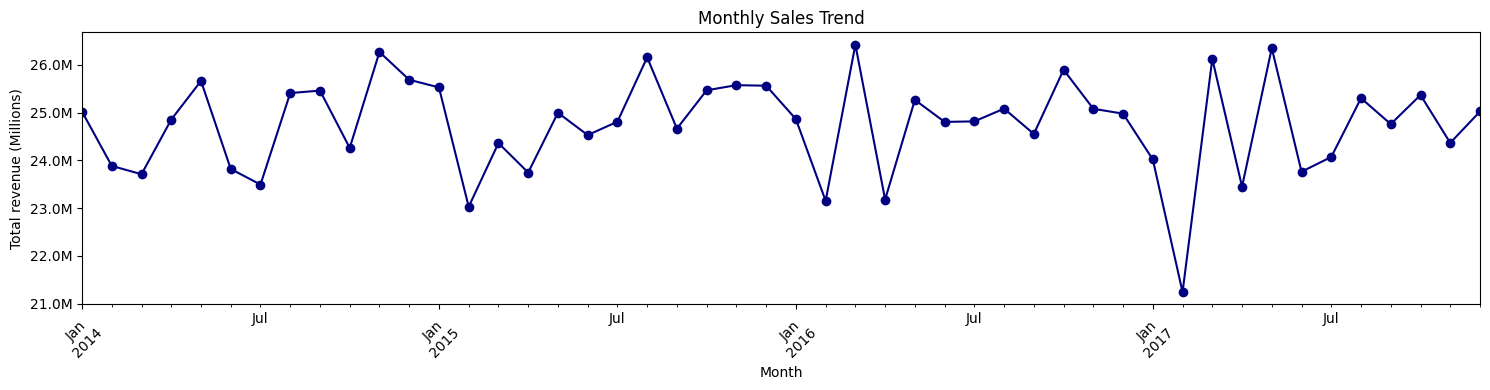

In [ ]:
df_filtered['order month']=df_filtered['orderdate'].dt.to_period('M')
monthly_sales=df_filtered.groupby('order month')['line total'].sum()

plt.figure(figsize=(15,4))
monthly_sales.plot(marker='o', color='navy')

from matplotlib.ticker import FuncFormatter
formatter=FuncFormatter(lambda x,pos: f'{x/1e6:.1f}M')

plt.gca().yaxis.set_major_formatter(formatter)
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total revenue (Millions)')

plt.xticks(rotation=45)
plt.tight_layout()

/tmp/ipython-input-119681548.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['order month name']=df_filtered['orderdate'].dt.month_name()
/tmp/ipython-input-119681548.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['order month number']=df_filtered['orderdate'].dt.month


Text(0.5, 1.0, 'Overall Monthly Sales Trend')

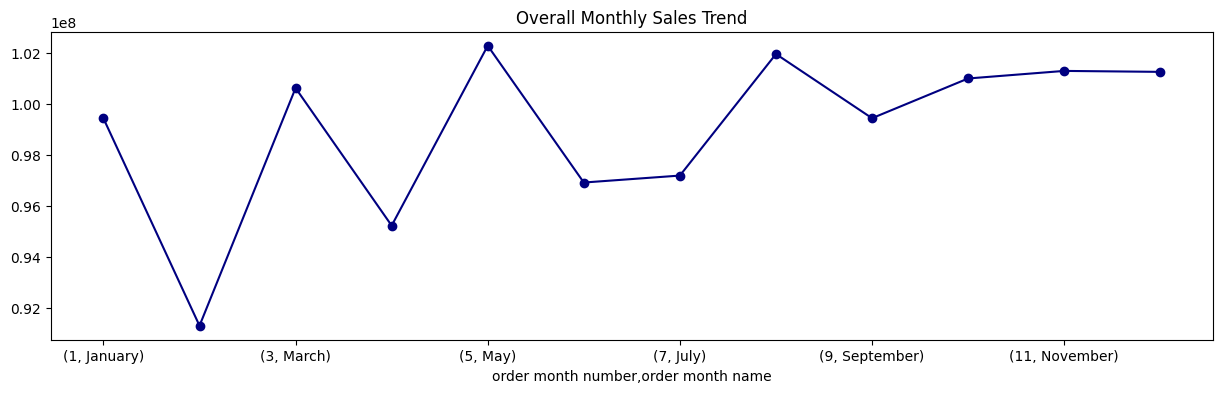

In [ ]:
df_filtered['order month name']=df_filtered['orderdate'].dt.month_name()
df_filtered['order month number']=df_filtered['orderdate'].dt.month

monthly_sales=df_filtered.groupby(['order month number','order month name'])['line total'].sum().sort_index()

plt.figure(figsize=(15,4))
monthly_sales.plot(marker='o', color='navy')
plt.title('Overall Monthly Sales Trend')

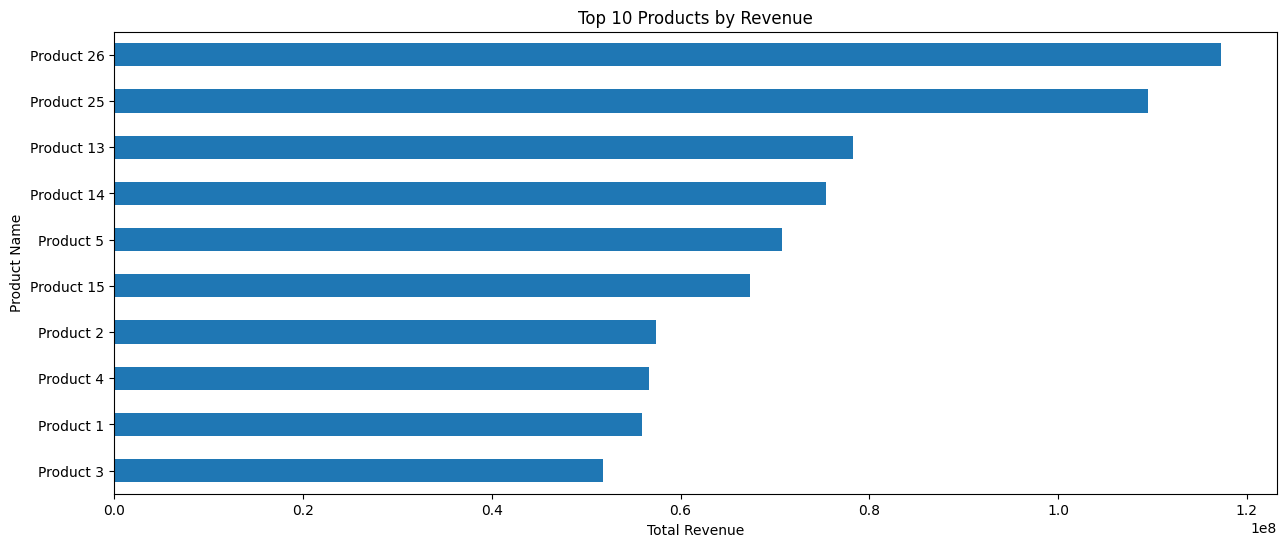

In [ ]:
top_10_products=df1.groupby('product name')['line total'].sum().nlargest(10).sort_values(ascending=True)
plt.figure(figsize=(15,6))
top_10_products.plot(kind='barh')
plt.title('Top 10 Products by Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Product Name')
plt.show()

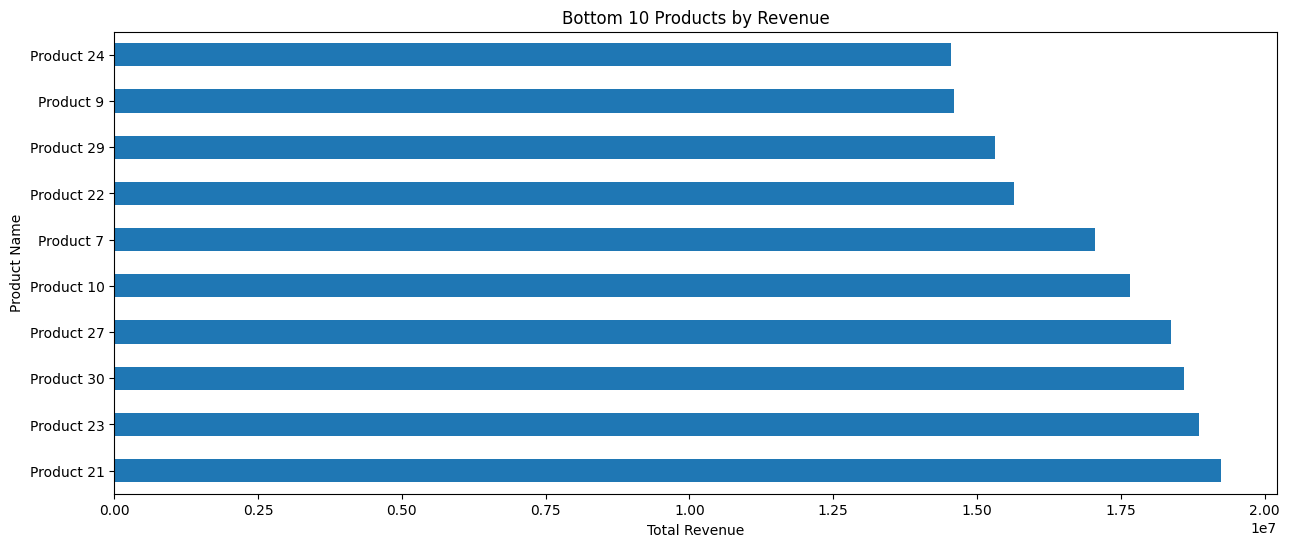

In [ ]:
bottom_10_products=df1.groupby('product name')['line total'].sum().nsmallest(10).sort_values(ascending=False)
plt.figure(figsize=(15,6))
bottom_10_products.plot(kind='barh')
plt.title('Bottom 10 Products by Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Product Name')
plt.show()

In [ ]:
print(df1['channel'].unique())

['Wholesale' 'Distributor' 'Export']


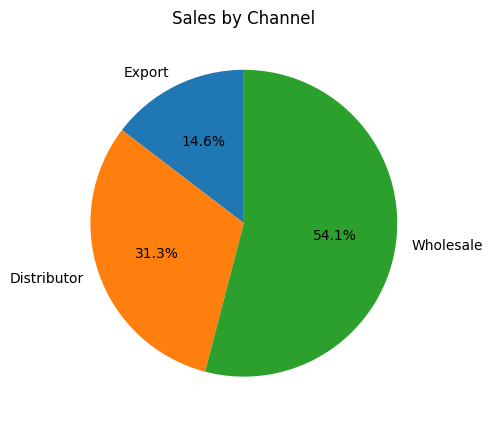

In [ ]:
channel_sales=df1.groupby('channel')['line total'].sum().sort_values(ascending=True)
plt.figure(figsize=(5,5))
channel_sales.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Sales by Channel')
plt.ylabel('')
plt.tight_layout()
plt.show()

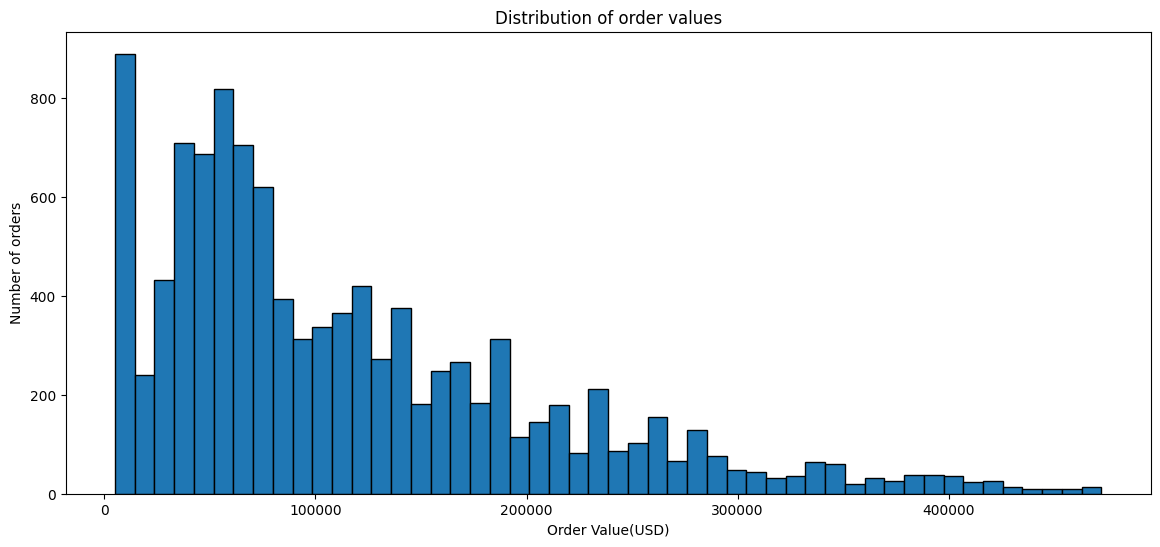

In [ ]:
avg_order_val_dist=df1.groupby('ordernumber')['line total'].sum()
plt.figure(figsize=(14,6))
##plt.hist(avg_order_val_dist,edgecolor='black',bins=50)
avg_order_val_dist.plot(kind='hist',edgecolor='black',bins=50)
plt.title('Distribution of order values')
plt.xlabel('Order Value(USD)')
plt.ylabel('Number of orders')
plt.show()

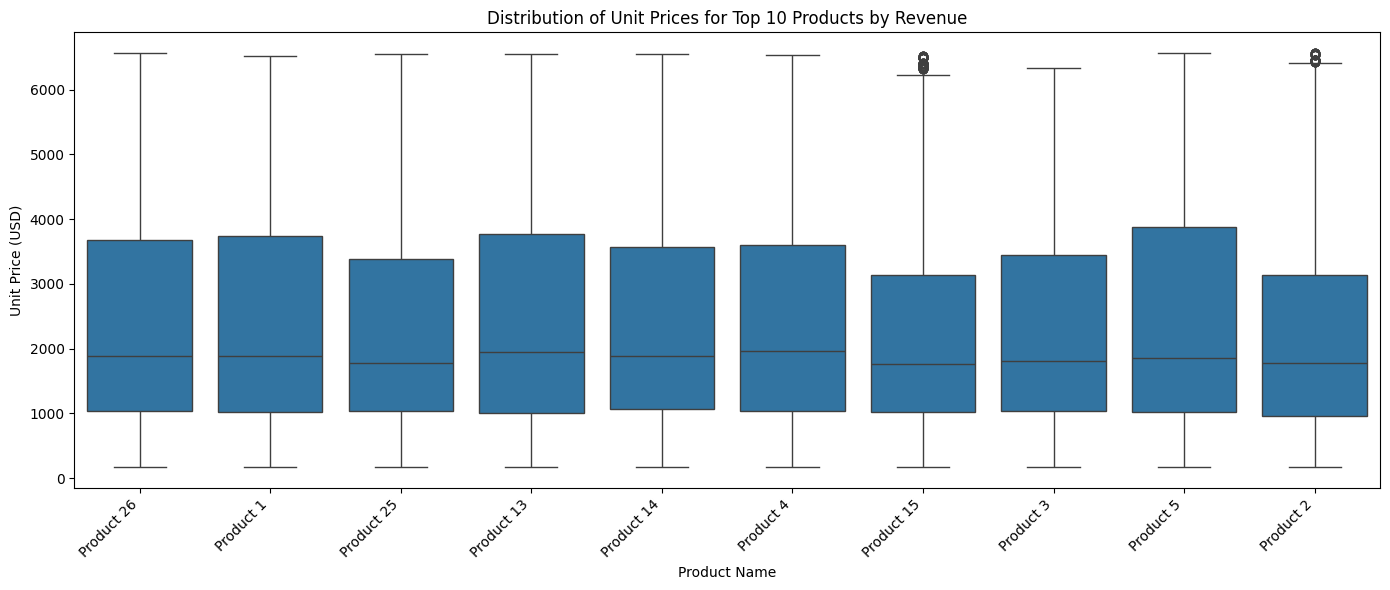

In [ ]:
top_10_products_names = df1.groupby('product name')['line total'].sum().nlargest(10).index.tolist()
df_top10 = df1[df1['product name'].isin(top_10_products_names)]
unit_price_dist = df_top10.groupby('product name')['unit price'].sum()

plt.figure(figsize=(14,6))
sns.boxplot(x=df_top10['product name'], y=df_top10['unit price'])
plt.title('Distribution of Unit Prices for Top 10 Products by Revenue')
plt.xlabel('Product Name')
plt.ylabel('Unit Price (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

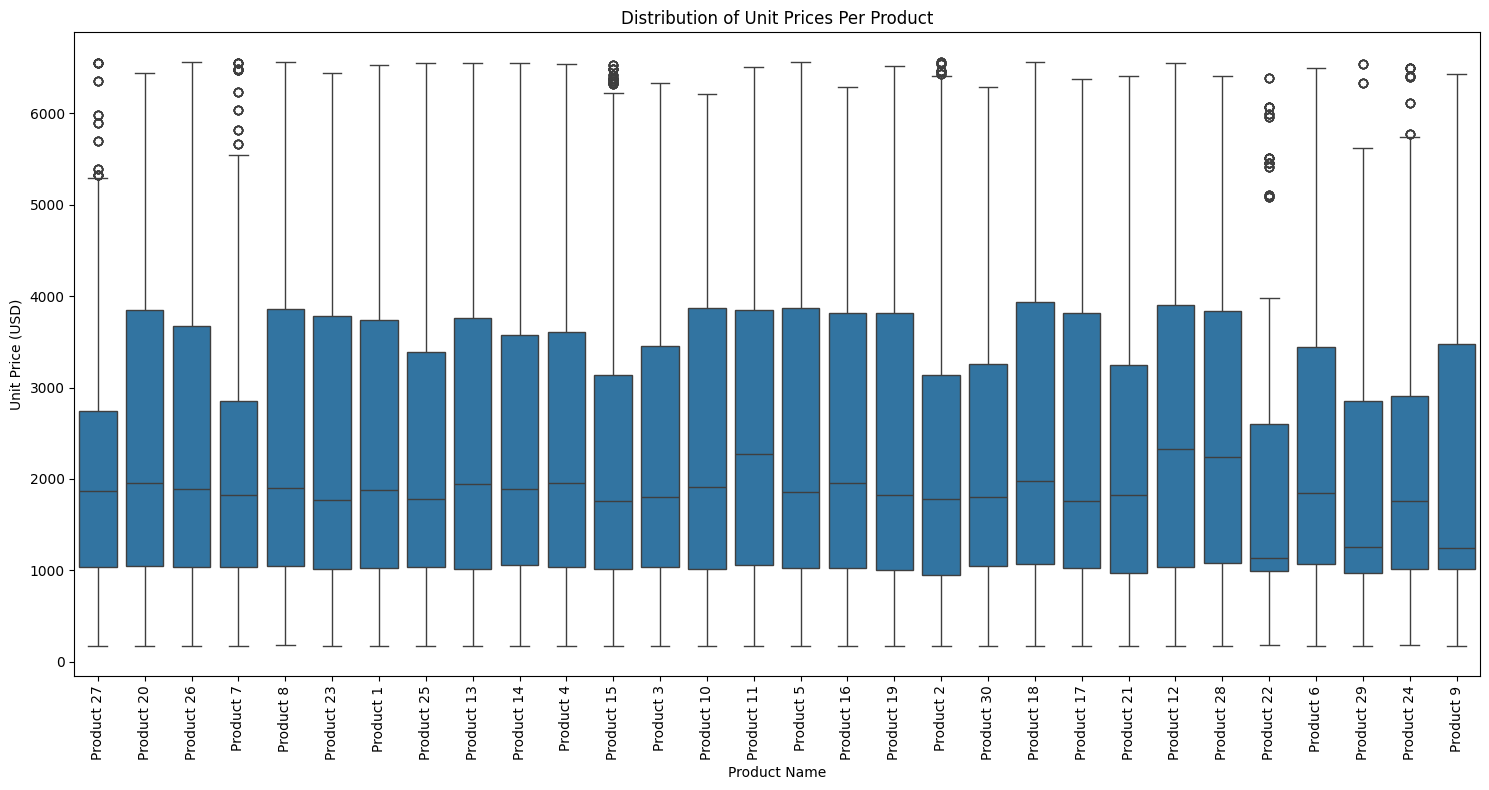

In [ ]:
plt.figure(figsize=(15, 8))
sns.boxplot(x=df1['product name'], y=df1['unit price'])
plt.title('Distribution of Unit Prices Per Product')
plt.xlabel('Product Name')
plt.ylabel('Unit Price (USD)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

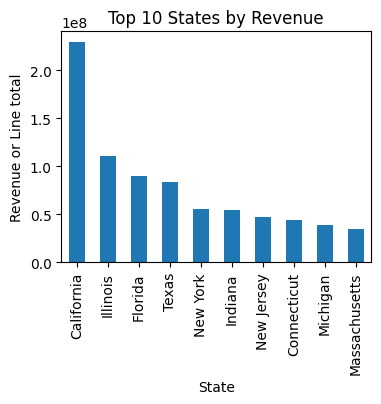

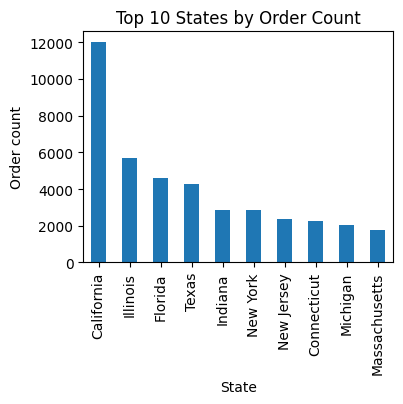

In [ ]:
top_10_states_lt=df1.groupby('state')['line total'].sum().nlargest(10).sort_values(ascending=False)
plt.figure(figsize=(4,3))
top_10_states_lt.plot(kind='bar')
plt.title('Top 10 States by Revenue')
plt.xlabel('State')
plt.ylabel('Revenue or Line total')
plt.show()

top_10_states_order=df1.groupby('state')['ordernumber'].count().nlargest(10).sort_values(ascending=False)
plt.figure(figsize=(4,3))
top_10_states_order.plot(kind='bar')
plt.title('Top 10 States by Order Count')
plt.xlabel('State')
plt.ylabel('Order count')
plt.show()

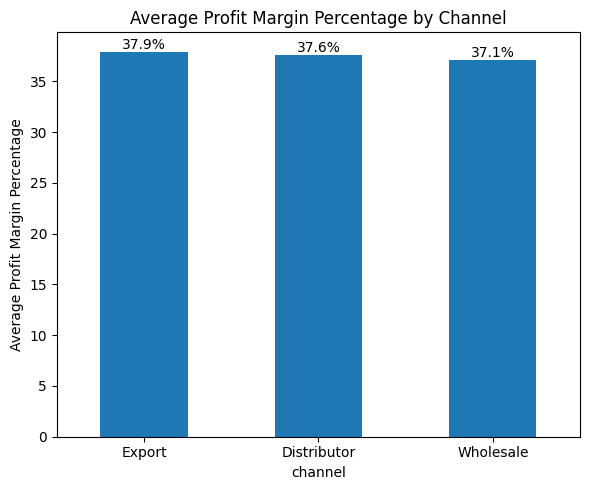

In [ ]:
channel_apm = df1.groupby('channel')['profit margin percentage'].mean().sort_values(ascending=False)

plt.figure(figsize=(6,5))
ax = channel_apm.plot(kind='bar')
plt.title('Average Profit Margin Percentage by Channel')
plt.ylabel('Average Profit Margin Percentage')
plt.xticks(rotation=0)
plt.tight_layout()
#print(ax.containers)
ax.bar_label(ax.containers[0], fmt='%.1f%%')

plt.show()


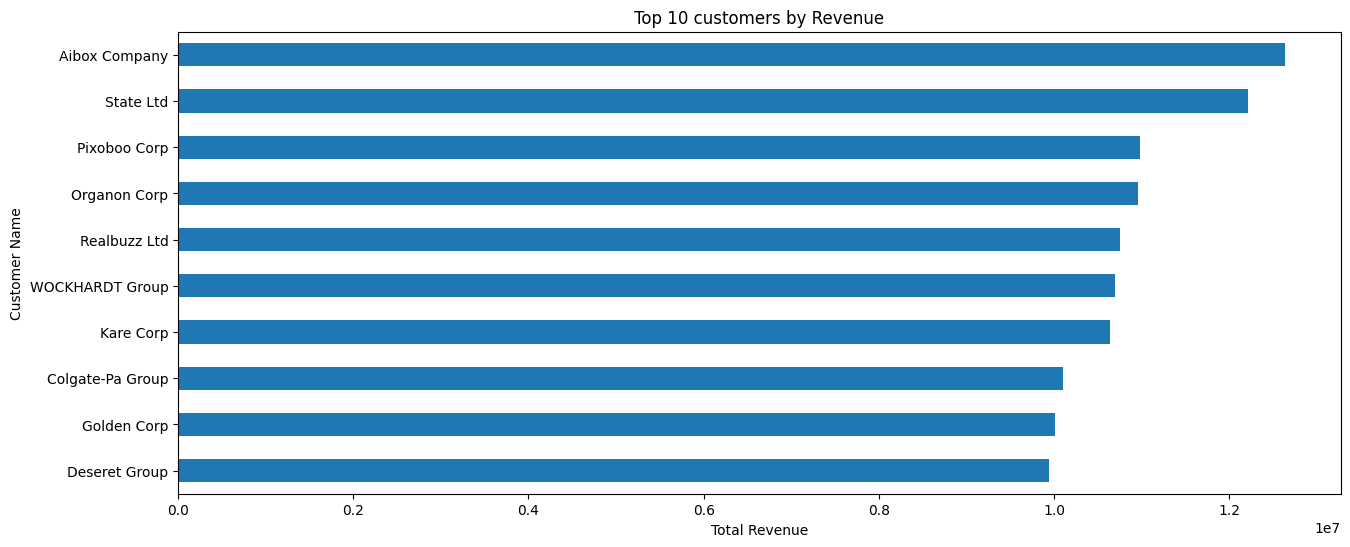

In [ ]:
top_10_customers=df1.groupby('customer names')['line total'].sum().nlargest(10).sort_values(ascending=True)
plt.figure(figsize=(15,6))
top_10_customers.plot(kind='barh')
plt.title('Top 10 customers by Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Customer Name')
plt.show()

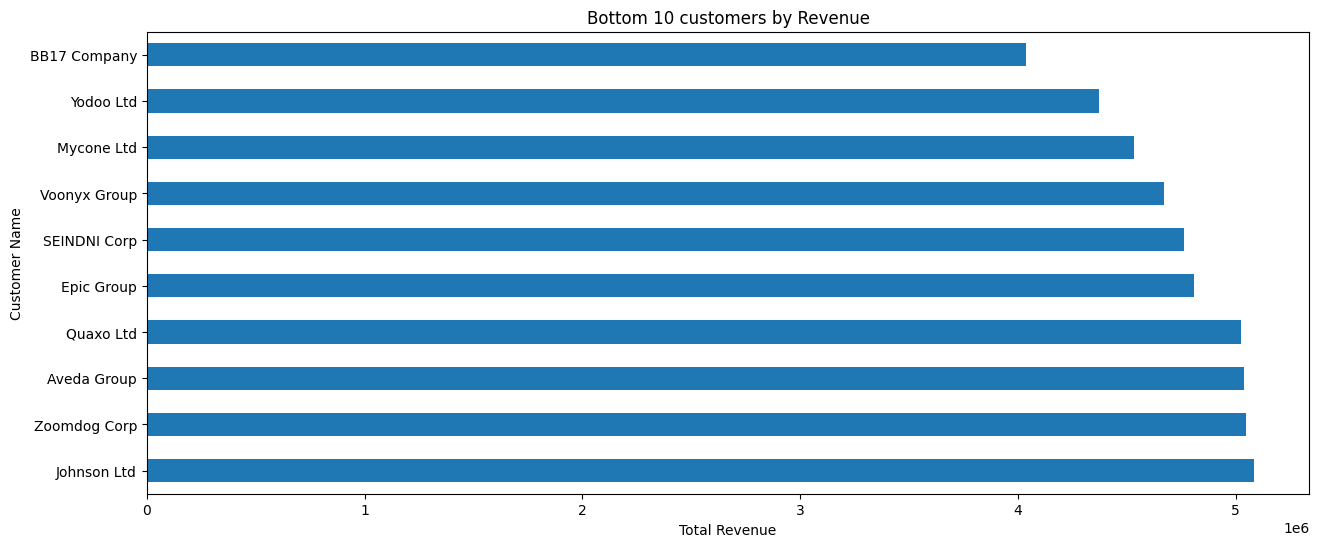

In [ ]:
bottom_10_customers=df1.groupby('customer names')['line total'].sum().nsmallest(10).sort_values(ascending=False)
plt.figure(figsize=(15,6))
bottom_10_customers.plot(kind='barh')
plt.title('Bottom 10 customers by Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Customer Name')
plt.show()

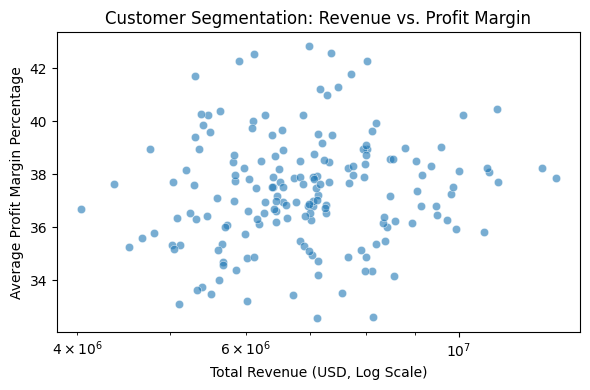

In [ ]:
customer_segmentation = df1.groupby('customer names').agg(total_revenue=('line total', 'sum'),average_profit_margin=('profit margin percentage', 'mean')).reset_index()

plt.figure(figsize=(6, 4))
sns.scatterplot(data=customer_segmentation, x='total_revenue', y='average_profit_margin', alpha=0.6)

plt.title('Customer Segmentation: Revenue vs. Profit Margin')
plt.xlabel('Total Revenue (USD, Log Scale)')
plt.ylabel('Average Profit Margin Percentage')
plt.xscale('log') # Use log scale for revenue due to wide range

plt.tight_layout()
plt.show()

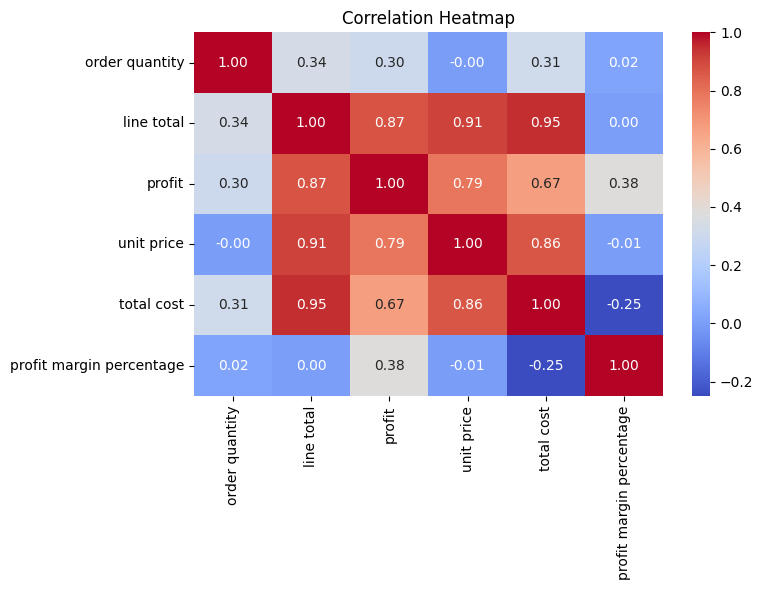

In [ ]:
correlation_cols = ['order quantity', 'line total', 'profit', 'unit price', 'total cost', 'profit margin percentage']
correlation_matrix = df1[correlation_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()